In [9]:
import random
from itertools import permutations
alltours = permutations

def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i]) 
        for i in range(len(aTour)))

aCity = complex

def distance_points(first, second):
    return abs(first - second)

def generate_cities(number_of_cities):
    seed = 111; width = 500; height = 300
    random.seed((number_of_cities, seed))
    return frozenset(aCity(random.randint(1, width), random.randint(1,height))
        for c in range(number_of_cities))

%matplotlib inline
import matplotlib.pyplot as plt

def visualize_tour(tour, style='bo-'):
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    visualize_segment(tour + start, style)
    visualize_segment(start, 'rD')

def visualize_segment(segment, style='bo-'):
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], 
      style, clip_on = False)
    plt.axis('scaled')
    plt.axis('off')

def X(city): "X axis"; return city.real

def Y(city): "Y axis"; return city.imag

from time import process_time
from collections import Counter

def tsp(algorithm, cities):
    t0 = process_time()
    tour = algorithm(cities)
    t1 = process_time()
    assert Counter(tour) == Counter(cities)
    visualize_tour(tour)
    print("{}:{} cities => tour length {:.0f}(in{:.3f} sec)".format(name(algorithm), len(tour), distance_tour(tour), t1 - t0))

def name(algorithm): return algorithm.__name__.replace('_tsp','')

def greedy_algorithm(cities, start = None):
    C = start or first(cities)
    tour = [C]
    unvisited = set(cities - {C})
    while unvisited:
        C = nearest_neighbor(C, unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def first(collection):
    return next(iter(collection))

def nearest_neighbor(A, cities):
    return min(cities, key = lambda C: distance_points(C, A))

greedy_algorithm:10 cities => tour length 1224(in0.000 sec)


C:\Users\herju\AppData\Local\Temp/ipykernel_12144/3063540369.py:16: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((number_of_cities, seed))


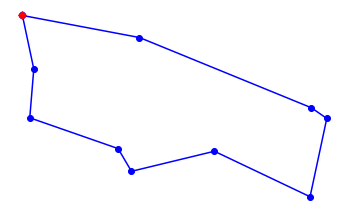

In [10]:
tsp(greedy_algorithm, generate_cities(10))

C:\Users\herju\AppData\Local\Temp/ipykernel_12144/3063540369.py:16: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((number_of_cities, seed))


greedy_algorithm:1988 cities => tour length 15755(in1.172 sec)


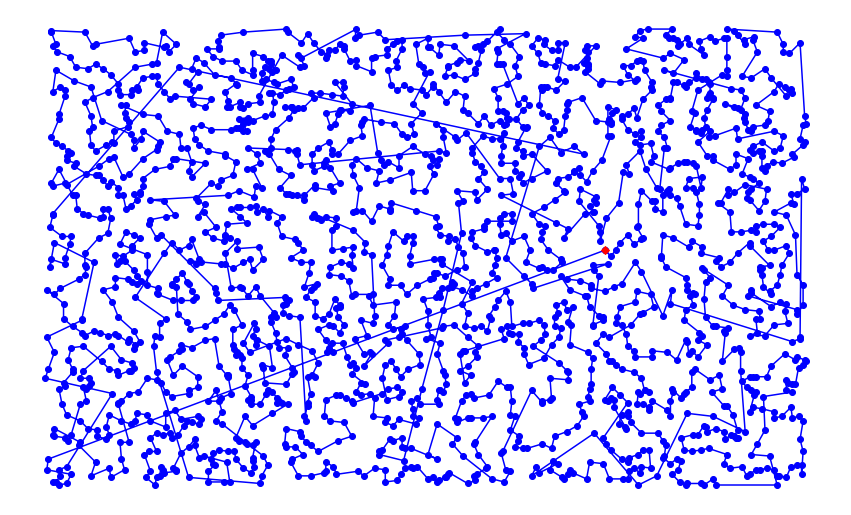

In [11]:
tsp(greedy_algorithm, generate_cities(2000))